In [1]:
%matplotlib notebook

In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [3]:
#loading and reading the csv file
crimes_csv = "../toronto-crime-analysis/crimes_csv.csv"
crimes_pd = pd.read_csv(crimes_csv)
crimes_pd['occurrencedate'] = pd.to_datetime(crimes_pd['occurrencedate'], unit = 'ms')
#crimes_pd['reporteddate'] = pd.to_datetime(crimes_pd['reporteddate'], unit='ms')
crimes_pd.head()

,Unnamed: 0,Hood_ID,Index_,MCI,Neighbourhood,event_unique_id,occurrencedate,occurrenceday,occurrencedayofweek,occurrencedayofyear,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype
0,0,84,976,Assault,Little Portugal (84),GO-2015942420,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
1,1,25,977,Assault,Glenfield-Jane Heights (25),GO-20162295518,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
2,2,71,978,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
3,3,71,979,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
4,4,58,980,Theft Over,Old East York (58),GO-20141573896,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Theft Over,House


In [4]:
crime_month_count = crimes_pd.groupby('occurrencemonth').size()
crime_month = crime_month_count.to_frame().reset_index()
crime_month = crime_month.rename(columns= {0: 'Crime Count',
                                           'occurrencemonth': 'Crime Month'
                                          })
crime_month = crime_month.sort_values(by = ['Crime Count'], ascending = False)
crime_month.head(12)

,Crime Month,Crime Count
10,October,11642
5,July,11605
9,November,11408
1,August,11334
8,May,11313
11,September,11295
6,June,11268
0,April,10623
2,December,10455
7,March,10039


<IPython.core.display.Javascript object>


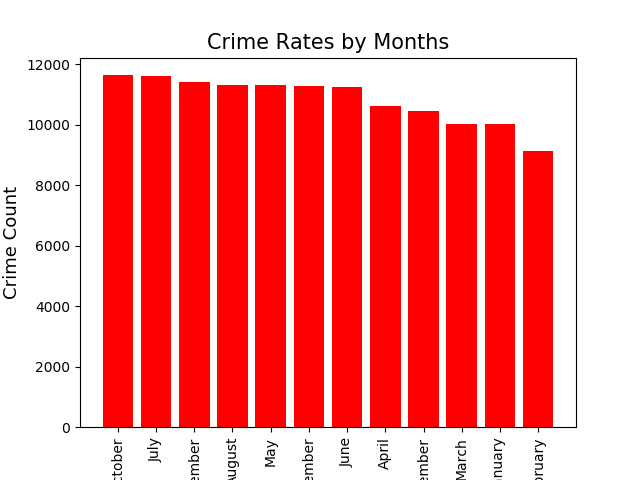

In [6]:
plt.bar(crime_month['Crime Month'], crime_month['Crime Count'], color="red")
    

plt.title('Crime Rates by Months', fontsize = 15)
plt.xlabel('Crime Month', fontsize = 13)
plt.ylabel('Crime Count', fontsize = 13)
plt.xticks(rotation = 'vertical')
plt.savefig('../toronto-crime-analysis/Crime Rates by Months')
plt.show()